# **02 - Sales Price Study**

## Objectives

* Answer business requirement 1:
The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualizations of the correlated variables against the sale price to show that
## Inputs

* outputs/datasets/collection/house_prices_records.csv

## Outputs

* Calculate the correlation coefficients between the house attributes and the sale price and visualize in a heat map. Create scatterplots of each correlated attribute against the sell price.
* Save correlation coefficients to:

outputs/house_prices_study/v1/corr_df_rev.csv

* Save dictionary used in encoding object variables to:

outputs/house_prices_study/v1/dic.pkl


## Additional Comments

* Seven variables out of 23 are strongly correlated with sale price
The sale price distribution is skewed to the right


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/pieterkdevilliers/Desktop/Development/Code Institute/pp5-heritage-housing/pp5-heritage-housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/pieterkdevilliers/Desktop/Development/Code Institute/pp5-heritage-housing/pp5-heritage-housing'

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv"))
df.head(10)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856.0,854.0,3.0,No,706.0,GLQ,150.0,0.0,548.0,2,...,65.0,196.0,61.0,5.0,7.0,856.0,0.0,2003,2003,208500.0
1,1262.0,0.0,3.0,Gd,978.0,ALQ,284.0,NaN,460.0,2,...,80.0,0.0,0.0,8.0,6.0,1262.0,NaN,1976,1976,181500.0
2,920.0,866.0,3.0,Mn,486.0,GLQ,434.0,0.0,608.0,2,...,68.0,162.0,42.0,5.0,7.0,920.0,NaN,2001,2002,223500.0
3,961.0,NaN,NaN,No,216.0,ALQ,540.0,NaN,642.0,1,...,60.0,0.0,35.0,5.0,7.0,756.0,NaN,1915,1970,140000.0
4,1145.0,NaN,4.0,Av,655.0,GLQ,490.0,0.0,836.0,2,...,84.0,350.0,84.0,5.0,8.0,1145.0,NaN,2000,2000,250000.0
5,796.0,566.0,1.0,No,732.0,GLQ,64.0,NaN,480.0,1,...,85.0,0.0,30.0,5.0,5.0,796.0,NaN,1993,1995,143000.0
6,1694.0,0.0,3.0,Av,1369.0,GLQ,317.0,NaN,636.0,2,...,75.0,186.0,57.0,5.0,8.0,1686.0,NaN,2004,2005,307000.0
7,1107.0,983.0,3.0,Mn,859.0,ALQ,216.0,NaN,484.0,NaN,...,NaN,240.0,204.0,6.0,7.0,1107.0,NaN,1973,1973,200000.0
8,1022.0,752.0,2.0,No,0.0,Unf,952.0,NaN,468.0,1,...,51.0,0.0,0.0,5.0,7.0,952.0,NaN,1931,1950,129900.0
9,1077.0,0.0,2.0,No,851.0,GLQ,140.0,NaN,205.0,2,...,50.0,0.0,4.0,6.0,5.0,991.0,NaN,1939,1950,118000.0


# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [5]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_41038/962869596.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation Study

We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We know this command returns a pandas series and the first item is the correlation between Churn and Churn, which happens to be 1, so we exclude that with `[1:]`
* We sort values considering the absolute value, by setting `key=abs`

In [15]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_41038/1835576946.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)


OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

We do the same for `pearson`

In [17]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_41038/819116545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)


OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

Combine both series of correlation coefficients and sort in ascending order for the heatmap:

In [18]:
corr = corr_spearman.append(corr_pearson).sort_values(key=abs, ascending=False).round(2)
corr_df = pd.DataFrame(index=['SalePrice'], columns=corr.index, data=corr.values.reshape(1,-1).tolist())
corr_df_rev = corr_df[corr_df.columns[::-1]]
corr

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_41038/1501292092.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr = corr_spearman.append(corr_pearson).sort_values(key=abs, ascending=False).round(2)


OverallQual     0.81
OverallQual     0.79
GrLivArea       0.73
GrLivArea       0.71
YearBuilt       0.65
GarageArea      0.65
GarageArea      0.62
TotalBsmtSF     0.61
1stFlrSF        0.61
TotalBsmtSF     0.60
GarageYrBlt     0.59
1stFlrSF        0.58
YearRemodAdd    0.57
YearBuilt       0.52
YearRemodAdd    0.51
GarageYrBlt     0.49
OpenPorchSF     0.48
MasVnrArea      0.48
LotArea         0.46
BsmtFinSF1      0.39
Name: SalePrice, dtype: float64

In [21]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

## Heatmap for correlation coefficients

Heatmap for correlation coefficients between house attributes and sale price

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_41038/1105132538.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_df_rev, dtype=np.bool)


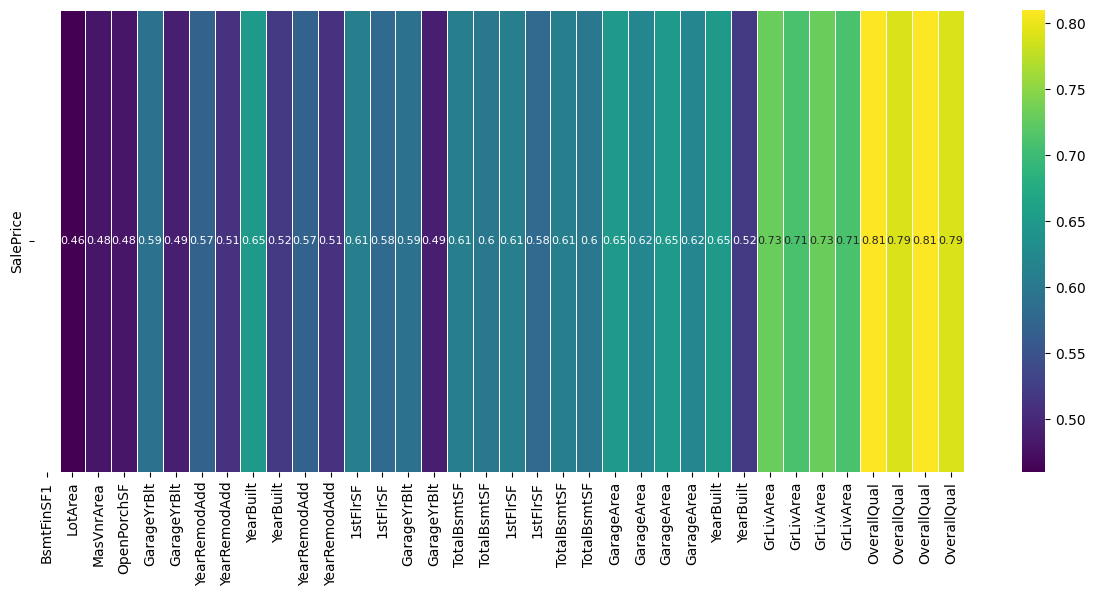

In [25]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(figsize=(15,6))
annot_size = 8

# Retain only correlation values above 0.4
mask = np.zeros_like(corr_df_rev, dtype=np.bool)
mask[corr_df_rev.abs() < 0.4] = True

sns.heatmap(data=corr_df_rev, annot=True, xticklabels=True, yticklabels=True,
            mask=mask, cmap='viridis', annot_kws={"size": annot_size}, ax=axes,
            linewidth=0.5)

plt.show()

The moderately strong correlation coefficients have values between 0.4 and 0.6. The strong correlation coefficients have values above 0.6. The house attribute most strongly correlated to the house price (with correlation coefficient 0.81) is the overall quality ('OverallQual') variable which is an ordinal variable.

In [26]:
# dtype_dic is a dictionary used to choose between a scatterplot and a strip plot
strongly_correlated = ['OverallQual', 'GrLivArea', '2ndFlrSF', 'KitchenQual', 'YearBuilt', 'GarageArea', 'GarageFinish']
moderately_correlated = ['GarageYrBlt', '1stFlrSF', 'TotalBsmtSF', 'YearRemodAdd', 'LotArea', 'LotFrontage', 'BsmtFinSF1']
dtype_dict = {'OverallQual': 'object', 'GrLivArea': 'numeric', '2ndFlrSF': 'numeric', 'KitchenQual': 'object', 'YearBuilt': 'numeric', 'GarageArea': 'numeric', 'GarageFinish': 'object', 'GarageYrBlt': 'numeric', '1stFlrSF': 'numeric', 'TotalBsmtSF': 'numeric', 'YearRemodAdd': 'numeric', 'LotArea': 'numeric', 'LotFrontage': 'numeric', 'BsmtFinSF1': 'numeric'}

## Scatterplots between house attributes and sale price

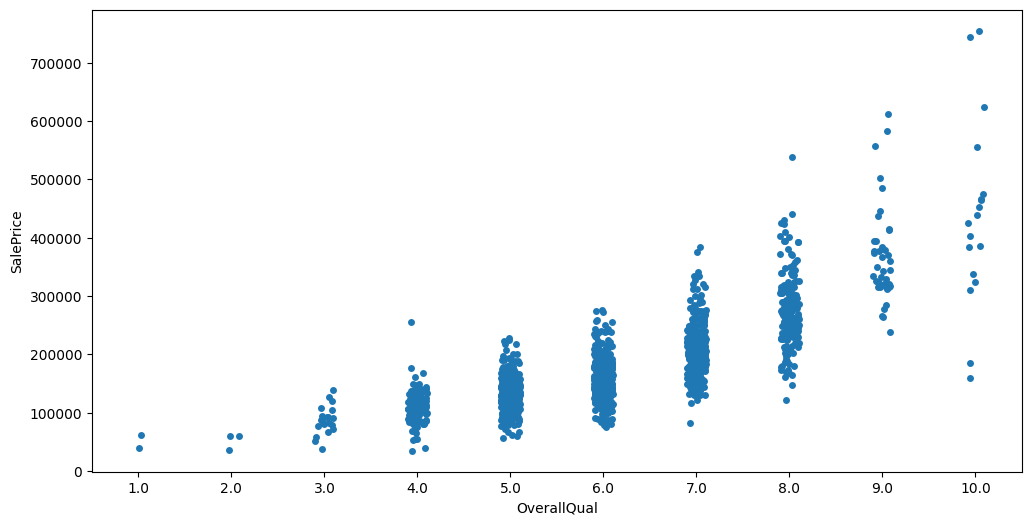

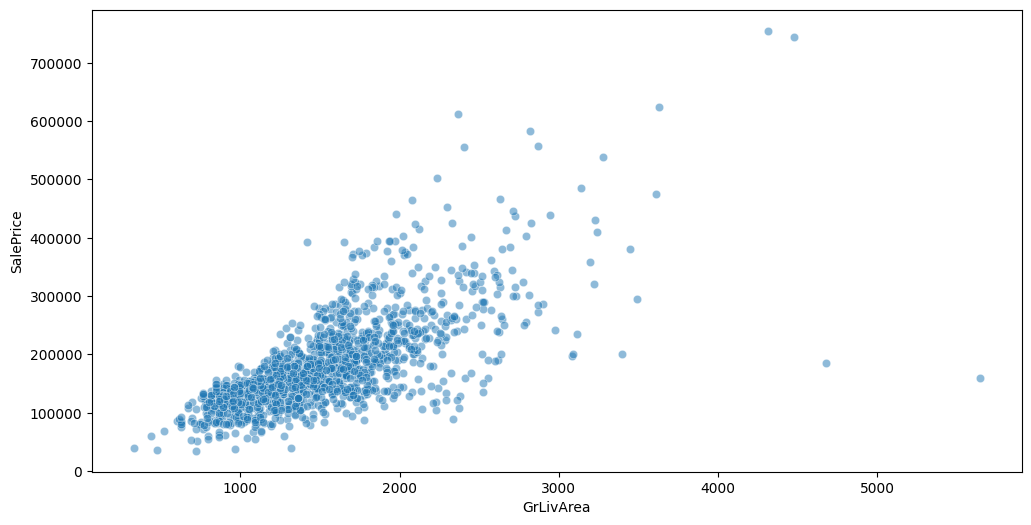

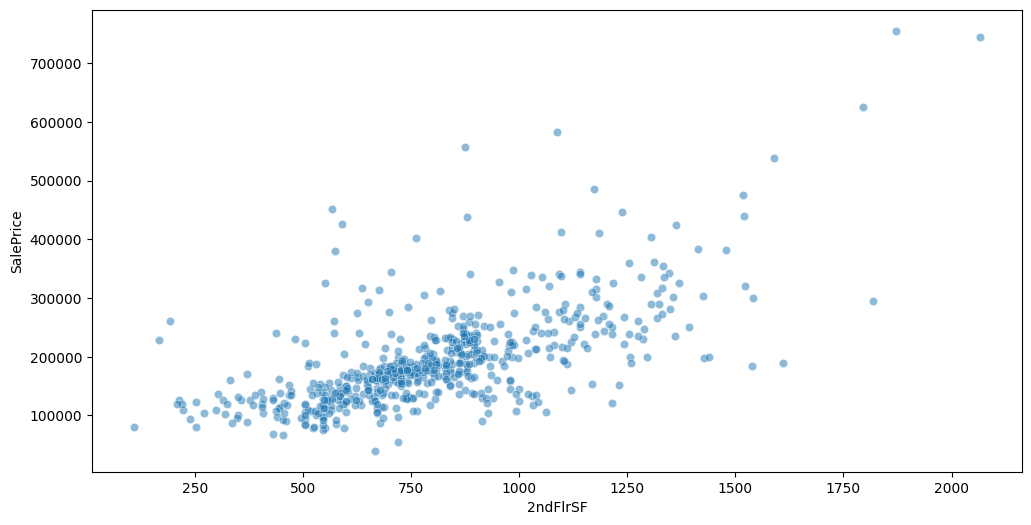

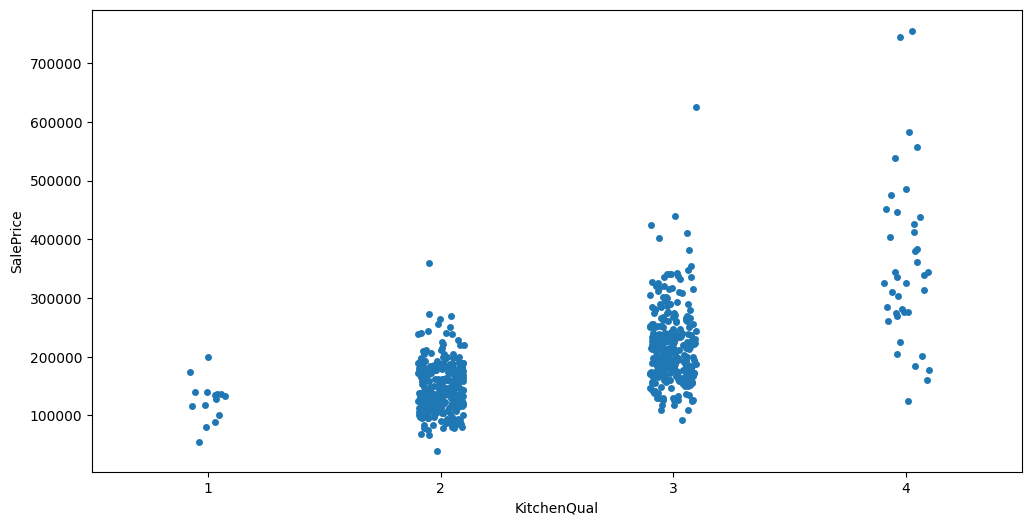

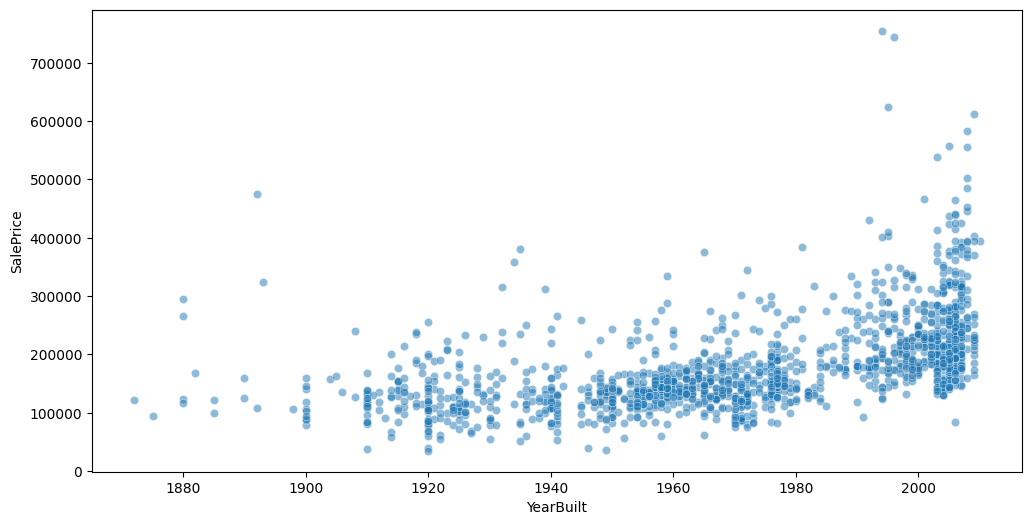

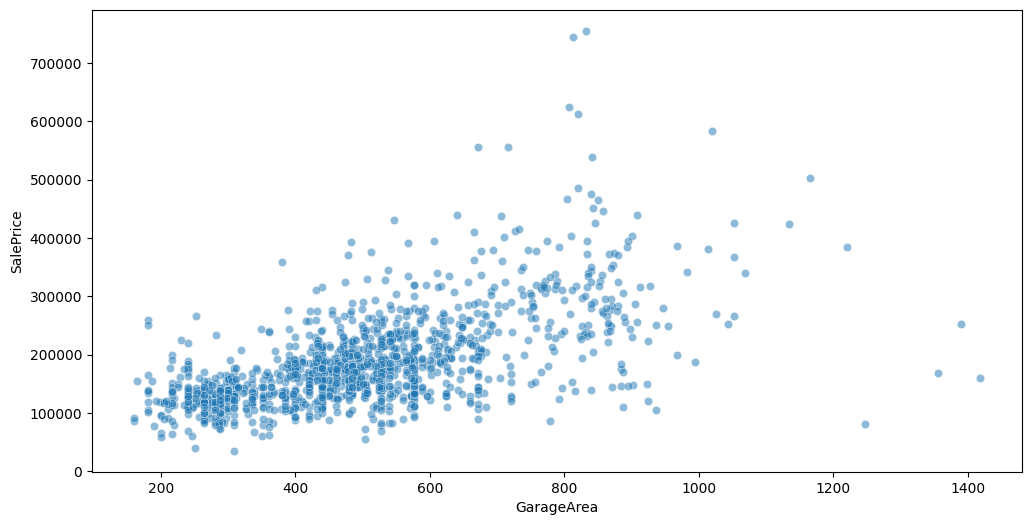

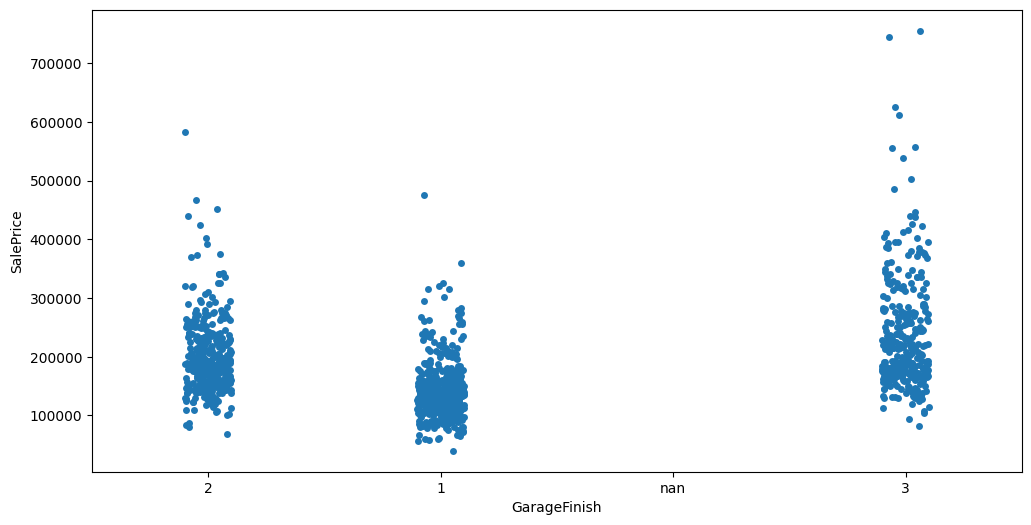

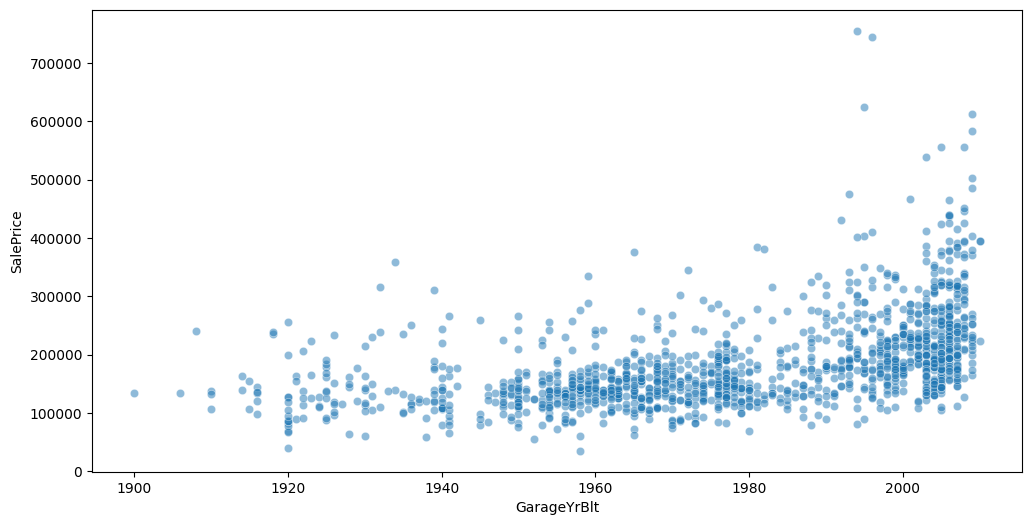

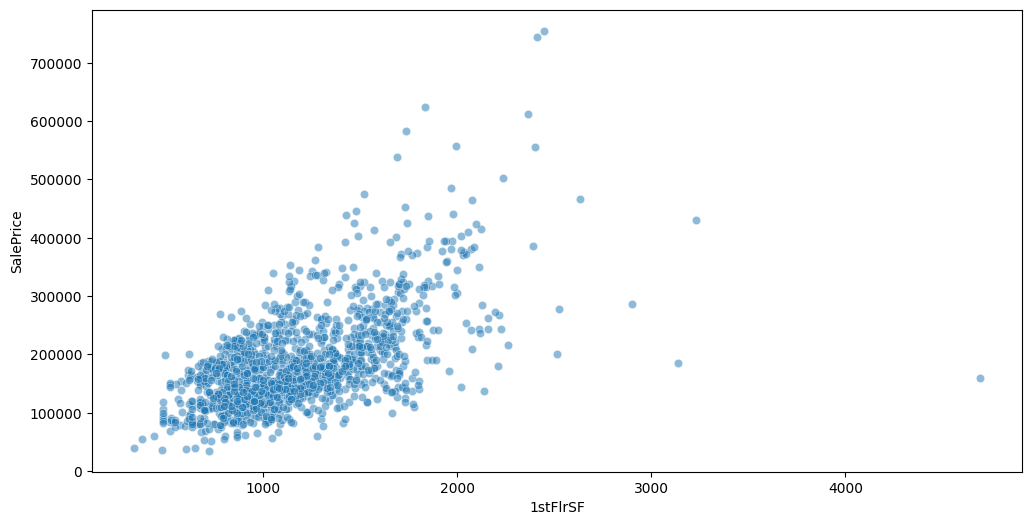

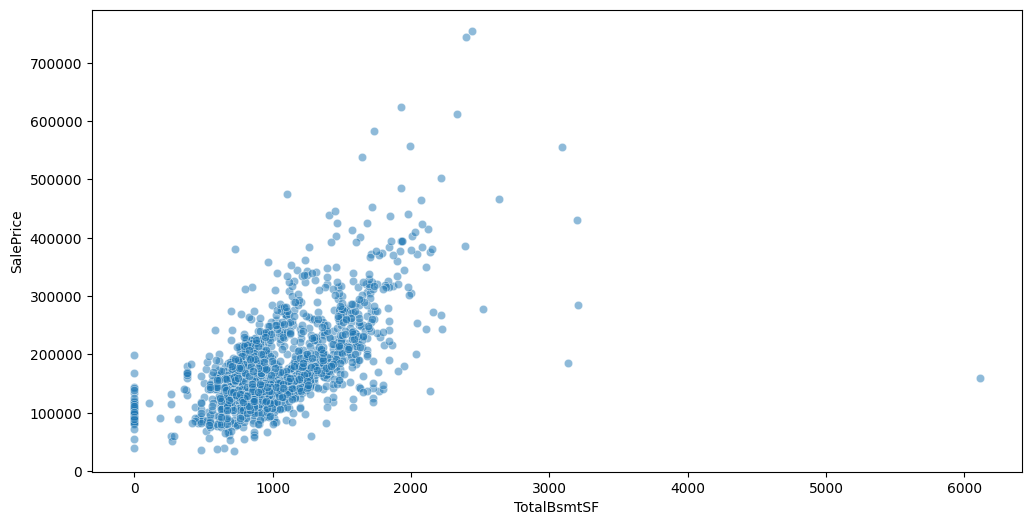

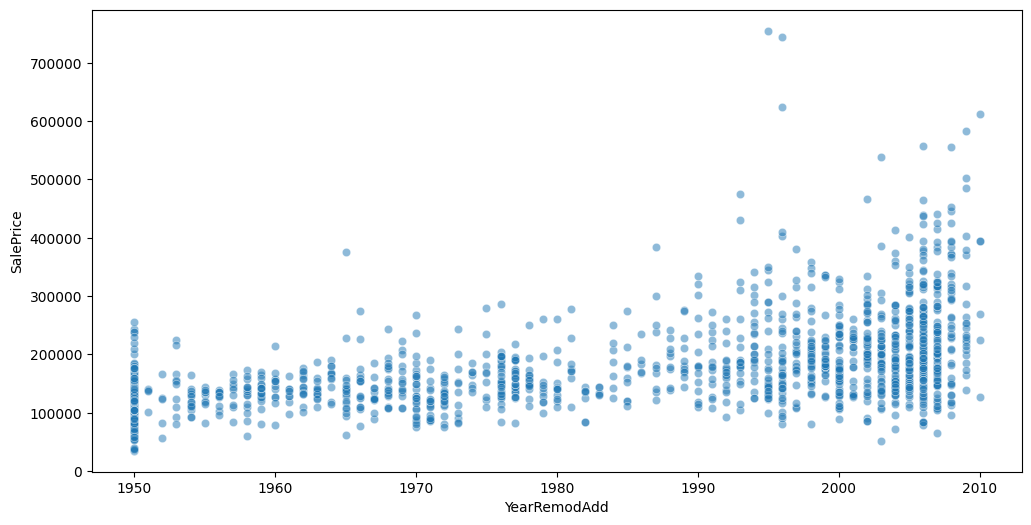

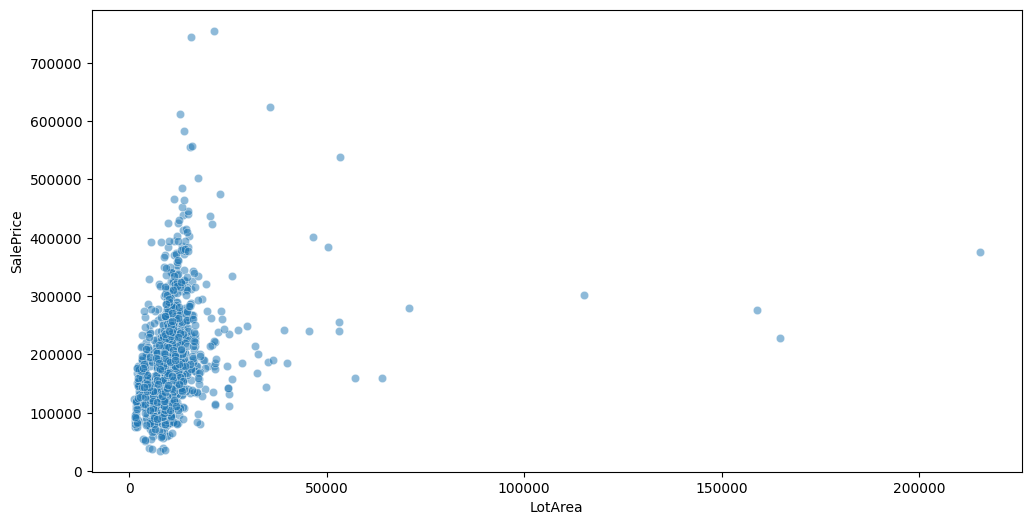

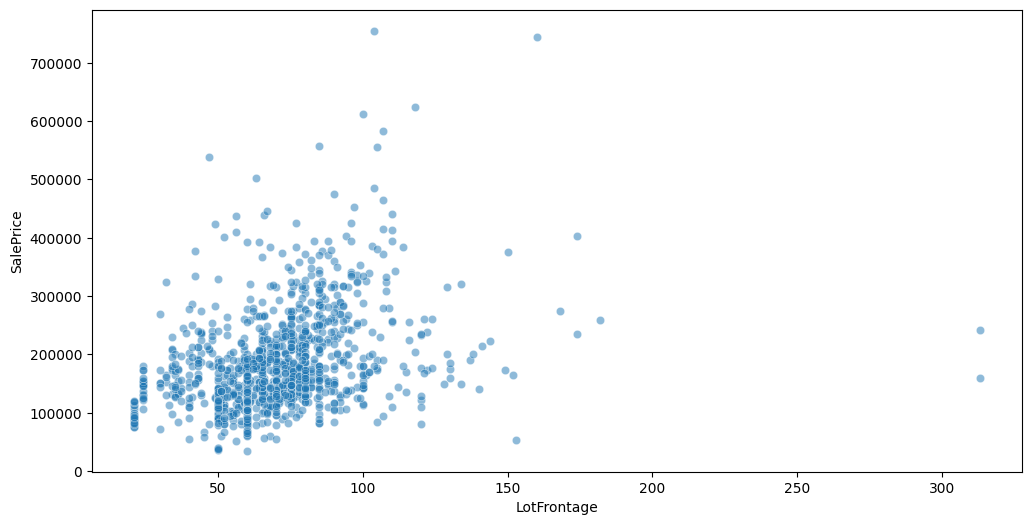

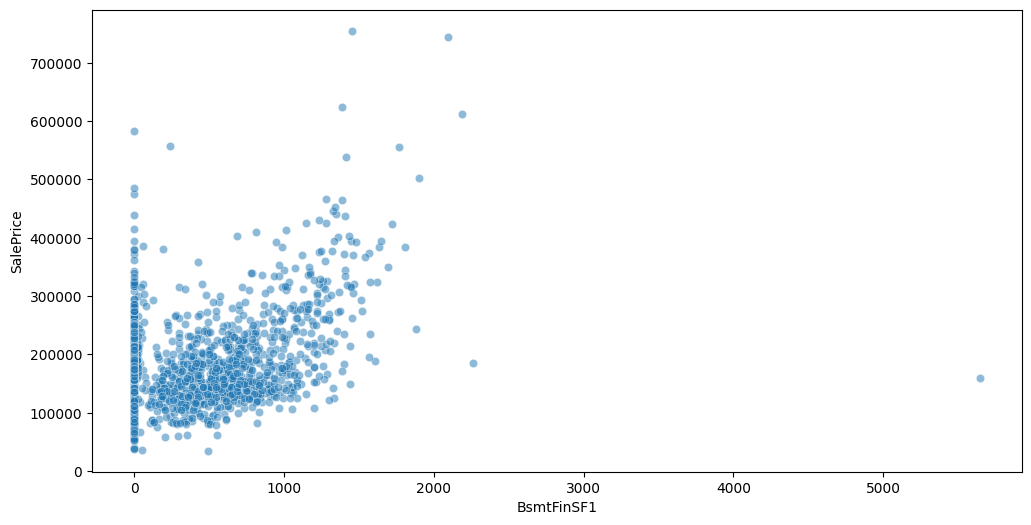

In [27]:
# Remove first zeros/None values and missing values
for col in strongly_correlated:
    if df[col].dtype == 'object':
        df1 = df[df[col]!='None']
        df2 = df1[df1[col].notnull()]
        df3[col] = df2[col].replace(dic[col])
    else:
        df1 = df[df[col]!=0]
        df3 = df1[df1[col].notnull()]
    if dtype_dict[col] == 'object':
        fig, axes = plt.subplots(figsize=(12,6))
        sns.stripplot(data=df3, x=col, y='SalePrice')
        plt.show()
    elif dtype_dict[col] == 'numeric':
        fig, axes = plt.subplots(figsize=(12,6))
        sns.scatterplot(data=df3, x=col, y='SalePrice', alpha=0.5)
        plt.show()

for col in moderately_correlated:
    if df[col].dtype == 'object':
        df1 = df[df[col]!='None']
        df2 = df1[df1[col].notnull()]
        df3[col] = df2[col].replace(dic[col])
    else:
        df1 = df[df[col]!=0]
        df3 = df1[df1[col].notnull()]
    if dtype_dict[col] == 'object':
        fig, axes = plt.subplots(figsize=(12,6))
        sns.stripplot(data=df, x=col, y='SalePrice')
        plt.show()
    elif dtype_dict[col] == 'numeric':
        fig, axes = plt.subplots(figsize=(12,6))
        sns.scatterplot(data=df, x=col, y='SalePrice', alpha=0.5)
        plt.show()

We see that the stronger the correlation the clearer the trend

---

# Explore sale price distribution

In [28]:
# Code from Code Institute Scikit lesson
sns.set_style("whitegrid")
def plot_histogram_and_boxplot(df):
  for col in df.columns:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0], whis=3)
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
    plt.show()

    # An outlier is defined to be outside the box in the boxplot by three times the
    # interquantile distance
    IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
    print(
        f"This is the range where a datapoint is not an outlier: from "
        f"{(df[col].quantile(q=0.25) - 3*IQR).round(2)} to "
        f"{(df[col].quantile(q=0.75) + 3*IQR).round(2)}")
    print("\n")

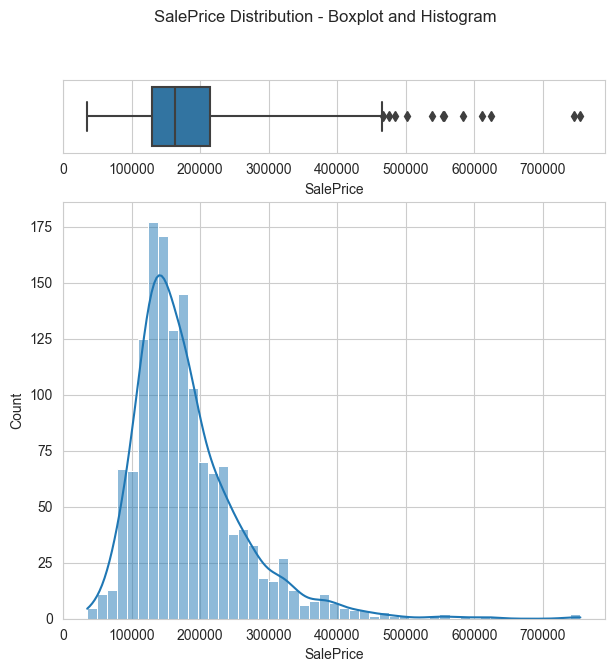

This is the range where a datapoint is not an outlier: from -122100.0 to 466075.0




In [29]:
df2=df.filter(['SalePrice'])
plot_histogram_and_boxplot(df2)

We see that the distribution has a long right tail or in other words it is skewed to the right.

### Store correlation coefficients dataframe

In [30]:
import joblib
import os

version = 'v1'
file_path = f'outputs/house_prices_study/{version}'

try:
  os.makedirs(name=file_path)
except Exception as e:
  print(e)

In [31]:
corr_df_rev.to_csv(f"{file_path}/corr_df_rev.csv", index=False)

### Store dictionary used for encoding object variables

In [32]:
joblib.dump(value=dic, filename=f"{file_path}/dic.pkl")

['outputs/house_prices_study/v1/dic.pkl']

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [33]:
import os
try:
  # create here your folder
  os.makedirs(name='outputs/datasets/collection')
except Exception as e:
  print(e)


[Errno 17] File exists: 'outputs/datasets/collection'
